# Import Packages

In [4]:
import numpy as np
import pandas as pd
import data_clean_utils
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [5]:
%pip install mlflow dagshub

In [6]:
import dagshub
dagshub.init(repo_owner='ShobhanaVerma07', repo_name='Food_Delivery_Time_Prediction', mlflow=True)

Accessing as ShobhanaVerma07

Initialized MLflow to track repo "ShobhanaVerma07/Food_Delivery_Time_Prediction"

Repository ShobhanaVerma07/Food_Delivery_Time_Prediction initialized!

In [7]:
import mlflow

In [8]:
# set the tracking server

mlflow.set_tracking_uri("https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow")

In [9]:
# mlflow experiment

mlflow.set_experiment("Exp 2 - Model Selection")

<Experiment: artifact_location='mlflow-artifacts:/4af3532948f4491c866d568d8a255bc3', creation_time=1737368888151, experiment_id='3', last_update_time=1737368888151, lifecycle_stage='active', name='Exp 2 - Model Selection', tags={}>

In [10]:
from sklearn import set_config

set_config(transform_output="pandas")

# Load the Data

In [11]:
# load the data

df = pd.read_csv('swiggy.csv')

df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


# Clean Data

In [12]:
data_clean_utils.perform_data_cleaning(df)

In [13]:
# load the cleaned data

df = pd.read_csv('swiggy_cleaned.csv')

df

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance,distance_type
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149,short
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,BANG,25,3,friday,0,5.0,19.0,evening,20.183530,very_long
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758,short
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401,medium
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846,short
45498,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN,NaN
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,CHEN,11,3,friday,0,15.0,23.0,night,4.657195,short
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393,medium


In [14]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [15]:
# drop columns not required for model input

columns_to_drop =  ['rider_id',
                    'restaurant_latitude',
                    'restaurant_longitude',
                    'delivery_latitude',
                    'delivery_longitude',
                    'order_date',
                    "order_time_hour",
                    "order_day",
                    "city_name",
                    "order_day_of_week",
                    "order_month"]

df.drop(columns=columns_to_drop, inplace=True)

df

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,32,0,10.0,morning,1.489846,short
45498,21.0,4.6,windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,36,0,15.0,evening,NaN,NaN
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,16,0,15.0,night,4.657195,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,26,0,5.0,afternoon,6.232393,medium


In [16]:
# check for missing values

df.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
is_weekend                0
pickup_time_minutes    1640
order_time_of_day      2070
distance               3630
distance_type          3630
dtype: int64

In [17]:
# check for duplicates

df.duplicated().sum()

0

<Axes: >

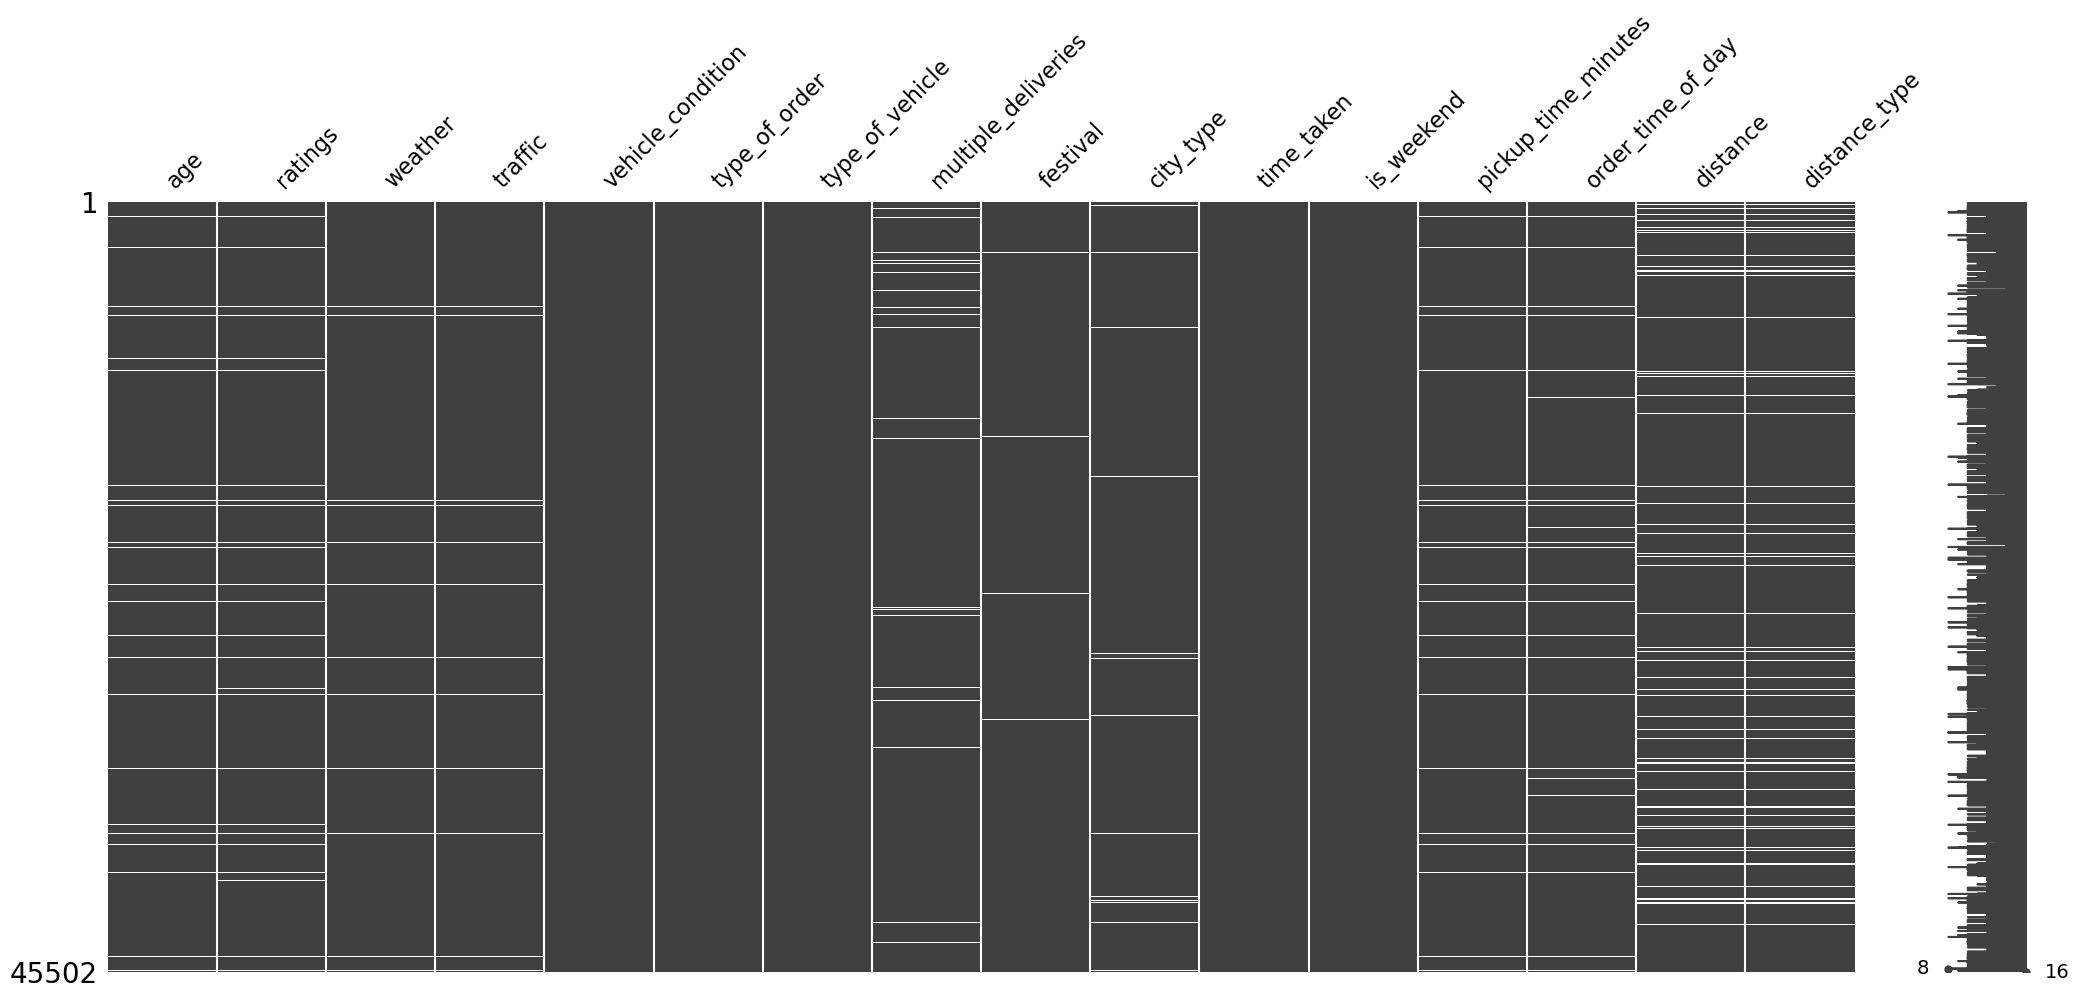

In [18]:
import missingno as msno

msno.matrix(df)

In [19]:
# columns that have missing values

missing_cols = (
                    df
                    .isna()
                    .any(axis=0)
                    .loc[lambda x: x]
                    .index
                )

missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

# Drop Missing values

In [20]:
temp_df = df.copy().dropna()

In [21]:
# split into X and y

X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

X

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45496,35.0,4.2,windy,jam,2,drinks,motorcycle,1.0,no,metropolitian,0,10.0,night,16.600272,very_long
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,0,10.0,morning,1.489846,short
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,0,15.0,night,4.657195,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,0,5.0,afternoon,6.232393,medium


In [22]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (30156, 15)
The shape of test data is (7539, 15)


In [24]:
# missing values in train data

X_train.isna().sum()

age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
is_weekend             0
pickup_time_minutes    0
order_time_of_day      0
distance               0
distance_type          0
dtype: int64

In [25]:
# transform target column

pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [26]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [27]:
# percentage of rows in data having missing values

(
    X_train
    .isna()
    .any(axis=1)
    .mean()
    .round(2) * 100
)


0.0

# Pre Processing Pipeline

In [28]:
num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather',
                    'type_of_order',
                    'type_of_vehicle',
                    "festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [29]:
nominal_cat_cols

['weather',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'is_weekend',
 'order_time_of_day']

In [30]:
X_train.isna().sum()

age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
is_weekend             0
pickup_time_minutes    0
order_time_of_day      0
distance               0
distance_type          0
dtype: int64

In [31]:
# do basic preprocessing

num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [32]:
# generate order for ordinal encoding

traffic_order = ["low","medium","high","jam"]

distance_type_order = ["short","medium","long","very_long"]

In [33]:
# unique categories the ordinal columns

for col in ordinal_cat_cols:
    print(col,X_train[col].unique())

traffic ['jam' 'medium' 'high' 'low']
distance_type ['medium' 'short' 'long' 'very_long']


In [34]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", MinMaxScaler(), num_cols),  # Scaling numerical columns
        ("nominal_encode", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), nominal_cat_cols),  # One-hot encoding for nominal categorical columns
        ("ordinal_encode", OrdinalEncoder(categories=[traffic_order, distance_type_order], 
                                          handle_unknown="use_encoded_value", 
                                          unknown_value=-1), ordinal_cat_cols)  # Ordinal encoding for ordinal categorical columns
    ],
    remainder="passthrough",  # Pass through columns not specified in transformers
    n_jobs=-1,  # Use all processors for parallel computation
    verbose_feature_names_out=False  # Use concise feature names
)

# Display the preprocessor object
preprocessor

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [35]:
# build the pipeline

processing_pipeline = Pipeline(steps=[
                                # ("simple_imputer",simple_imputer),
                                ("preprocess",preprocessor)
                                # ("knn_imputer",knn_imputer)
                            ])

processing_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  ['age', 'ratings',
                                                   'pickup_time_minutes',
                                                   'distance']),
                                                 ('nominal_encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False))])

In [36]:
# do data preprocessing

X_train_trans = processing_pipeline.fit_transform(X_train)

X_test_trans = processing_pipeline.transform(X_test)

In [37]:
X_train_trans

,age,ratings,pickup_time_minutes,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,...,city_type_semi-urban,city_type_urban,is_weekend_1,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,traffic,distance_type,vehicle_condition,multiple_deliveries
8708,0.473684,0.56,1.0,0.404165,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0,2.0
25198,1.000000,0.76,0.0,0.154044,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1.0
34049,0.473684,0.80,0.5,0.002461,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1,0.0
25987,1.000000,0.92,1.0,0.460411,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0,1.0
37121,0.526316,0.76,0.5,0.243676,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20239,0.578947,0.92,0.5,0.451895,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0,0,0.0
7590,0.052632,1.00,1.0,0.612270,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1,1.0
13610,0.526316,0.92,0.0,0.322877,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0.0
1045,0.947368,0.96,0.5,0.004486,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1.0


In [38]:
%pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [39]:
! pip install xgboost

In [40]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import optuna

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error

In [42]:
def objective(trial):
    with mlflow.start_run(nested=True):
        model_name = trial.suggest_categorical("model",["SVM","RF","KNN","GB","XGB","LGBM"])

        if model_name == "SVM":
            kernel_svm = trial.suggest_categorical("kernel_svm",["linear","poly","rbf"])
            if kernel_svm == "linear":
                c_linear = trial.suggest_float("c_linear",0,10)
                model = SVR(C=c_linear,kernel="linear")

            elif kernel_svm == "poly":
                c_poly = trial.suggest_float("c_poly",0,10)
                degree_poly = trial.suggest_int("degree_poly",1,5)
                model = SVR(C=c_poly,degree=degree_poly,
                            kernel="poly")

            else:
                c_rbf = trial.suggest_float("c_rbf",0,100)
                gamma_rbf = trial.suggest_float("gamma_rbf",0,10)
                model = SVR(C=c_rbf,gamma=gamma_rbf,
                            kernel="rbf")

        elif model_name == "RF":
            n_estimators_rf = trial.suggest_int("n_estimators_rf",10,200)
            max_depth_rf = trial.suggest_int("max_depth_rf",2,20)
            model = RandomForestRegressor(n_estimators=n_estimators_rf,
                                        max_depth=max_depth_rf,
                                        random_state=42,
                                        n_jobs=-1)

        elif model_name == "GB":
            n_estimators_gb = trial.suggest_int("n_estimators_gb",10,200)
            learning_rate_gb = trial.suggest_float("learning_rate_gb",0,1)
            max_depth_gb = trial.suggest_int("max_depth_gb",2,20)
            model = GradientBoostingRegressor(n_estimators=n_estimators_gb,
                                                learning_rate=learning_rate_gb,
                                                max_depth=max_depth_gb,
                                                random_state=42)

        elif model_name == "KNN":
            n_neighbors_knn = trial.suggest_int("n_neighbors_knn",1,25)
            weights_knn = trial.suggest_categorical("weights_knn",["uniform","distance"])
            model = KNeighborsRegressor(n_neighbors=n_neighbors_knn,
                                        weights=weights_knn,n_jobs=-1)

        elif model_name == "XGB":
            n_estimators_xgb = trial.suggest_int("n_estimators_xgb",10,200)
            learning_rate_xgb = trial.suggest_float("learning_rate_xgb",0.1,0.5)
            max_depth_xgb = trial.suggest_int("max_depth_xgb",2,20)
            model = XGBRegressor(n_estimators=n_estimators_xgb,
                                    learning_rate=learning_rate_xgb,
                                    max_depth=max_depth_xgb,
                                    random_state=42,
                                    n_jobs=-1)

        elif model_name == "LGBM":
            n_estimators_lgbm = trial.suggest_int("n_estimators_lgbm",10,200)
            learning_rate_lgbm = trial.suggest_float("learning_rate_lgbm",0.1,0.5)
            max_depth_lgbm = trial.suggest_int("max_depth_lgbm",2,20)
            model = LGBMRegressor(n_estimators=n_estimators_lgbm,
                                    learning_rate=learning_rate_lgbm,
                                    max_depth=max_depth_lgbm,
                                    random_state=42)


        # train the model
        model.fit(X_train_trans,y_train_pt.values.ravel())

        # log model params
        mlflow.log_params(model.get_params())

        # get the predictions
        y_pred_train = model.predict(X_train_trans)
        y_pred_test = model.predict(X_test_trans)

        # get the actual predictions values
        y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
        y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

        # calculate the error
        error = mean_absolute_error(y_test,y_pred_test_org)

        # log model_name
        mlflow.log_param("model",model_name)

        # log error
        mlflow.log_metric("MAE",error)

        return error

In [44]:
# create optuna study
study = optuna.create_study(direction="minimize",study_name="model_selection")

with mlflow.start_run(run_name="Best Model") as parent:
    # optimize the objective function
    study.optimize(objective,n_trials=30,n_jobs=-1)

    # log the best parameters 
    mlflow.log_params(study.best_params)

    # log the best score
    mlflow.log_metric("best_score",study.best_value)

[I 2025-01-21 05:48:59,382] A new study created in memory with name: model_selection


🏃 View run unruly-mare-269 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/ad703f89366145db9ae68f8813a50182
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 05:49:11,353] Trial 2 finished with value: 4.198899564767615 and parameters: {'model': 'KNN', 'n_neighbors_knn': 9, 'weights_knn': 'distance'}. Best is trial 2 with value: 4.198899564767615.


🏃 View run masked-fawn-522 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/2ba54b3215b644b5a31ac02093f44669
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 05:49:19,881] Trial 0 finished with value: 3.067753354146401 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 140, 'learning_rate_lgbm': 0.16778112951075913, 'max_depth_lgbm': 6}. Best is trial 0 with value: 3.067753354146401.


🏃 View run industrious-newt-60 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/625f5d3ae1f94b8ab1c9a728ccb72c1b
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 05:49:21,109] Trial 6 finished with value: 3.3279274817422446 and parameters: {'model': 'GB', 'n_estimators_gb': 137, 'learning_rate_gb': 0.22175041081137525, 'max_depth_gb': 3}. Best is trial 0 with value: 3.067753354146401.


🏃 View run zealous-yak-307 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/e716ba1171cb48e4919fbc8be80f0d63
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 05:49:27,101] Trial 4 finished with value: 3.2730446146438665 and parameters: {'model': 'XGB', 'n_estimators_xgb': 169, 'learning_rate_xgb': 0.3376511589529174, 'max_depth_xgb': 10}. Best is trial 0 with value: 3.067753354146401.


🏃 View run illustrious-robin-56 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/33c345d9b9ab46a4b14fc79e8e7ba8f7
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 05:49:32,417] Trial 3 finished with value: 4.081369286857615 and parameters: {'model': 'GB', 'n_estimators_gb': 29, 'learning_rate_gb': 0.9772299001660266, 'max_depth_gb': 19}. Best is trial 0 with value: 3.067753354146401.


🏃 View run kindly-carp-131 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/e5b7f4d0e0a8418299cd61d091722a41
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3
🏃 View run dapper-sloth-912 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/a8c45d2f6fed4744ae9308718b6bb789
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 05:49:42,218] Trial 9 finished with value: 3.0397986075080268 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 91, 'learning_rate_lgbm': 0.23382684986107735, 'max_depth_lgbm': 17}. Best is trial 9 with value: 3.0397986075080268.
[I 2025-01-21 05:49:45,064] Trial 5 finished with value: 3.3966843184686053 and parameters: {'model': 'XGB', 'n_estimators_xgb': 56, 'learning_rate_xgb': 0.32521761546474465, 'max_depth_xgb': 20}. Best is trial 9 with value: 3.0397986075080268.


🏃 View run legendary-owl-392 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/b12a12cc63434332a1c249ca9f74f874
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 05:49:50,032] Trial 11 finished with value: 3.067954814120444 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 57, 'learning_rate_lgbm': 0.4013093958032249, 'max_depth_lgbm': 12}. Best is trial 9 with value: 3.0397986075080268.


🏃 View run vaunted-snail-3 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/c94d82db7b4a4f1a81733f6823d4059e
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 05:49:53,043] Trial 8 finished with value: 3.3343804832801918 and parameters: {'model': 'GB', 'n_estimators_gb': 86, 'learning_rate_gb': 0.368147716296338, 'max_depth_gb': 11}. Best is trial 9 with value: 3.0397986075080268.


🏃 View run skillful-rat-268 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/3ce2db408bc343138444f4cb91192287
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 05:50:08,097] Trial 7 finished with value: 3.4759652474497127 and parameters: {'model': 'GB', 'n_estimators_gb': 146, 'learning_rate_gb': 0.45288270345351067, 'max_depth_gb': 13}. Best is trial 9 with value: 3.0397986075080268.


🏃 View run unequaled-toad-842 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/ca4aa4ee92114904ab0dcb83182e9900
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3
🏃 View run amazing-rat-700 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/d2601c147420483ba265e138d9b76cab
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3
🏃 View run industrious-gull-420 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/c6377253f11e4c2caef9a6bd8a0b9d90
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3
🏃 View run stylish-turtle-445 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/91f8708d753e46c384ef904b9e84c6ee
🧪 View experiment at: ht

[I 2025-01-21 05:50:16,987] Trial 13 finished with value: 3.071813817670532 and parameters: {'model': 'RF', 'n_estimators_rf': 101, 'max_depth_rf': 17}. Best is trial 9 with value: 3.0397986075080268.
[I 2025-01-21 05:50:17,974] Trial 15 finished with value: 3.171021066810617 and parameters: {'model': 'XGB', 'n_estimators_xgb': 116, 'learning_rate_xgb': 0.2720033539600495, 'max_depth_xgb': 4}. Best is trial 9 with value: 3.0397986075080268.
[I 2025-01-21 05:50:18,984] Trial 14 finished with value: 3.17872131280123 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 101, 'learning_rate_lgbm': 0.4380686136331644, 'max_depth_lgbm': 4}. Best is trial 9 with value: 3.0397986075080268.
[I 2025-01-21 05:50:20,352] Trial 16 finished with value: 3.0363242428196227 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 83, 'learning_rate_lgbm': 0.19584907006352734, 'max_depth_lgbm': 15}. Best is trial 16 with value: 3.0363242428196227.


🏃 View run colorful-hog-507 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/f01aa38505cd4e38bf8e71f9d3345960
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 06:29:53,075] Trial 12 finished with value: 4.6754331905394375 and parameters: {'model': 'SVM', 'kernel_svm': 'poly', 'c_poly': 8.395863808884291, 'degree_poly': 1}. Best is trial 16 with value: 3.0363242428196227.


🏃 View run bedecked-frog-311 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/ea41dfd411b641119b3e8069b5056904
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 06:30:47,083] Trial 22 finished with value: 3.0538145061592443 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 68, 'learning_rate_lgbm': 0.1979864588120741, 'max_depth_lgbm': 20}. Best is trial 16 with value: 3.0363242428196227.


🏃 View run worried-mule-144 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/96139d3cb26c49bd95be6d5bbdb253ee
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 06:32:10,323] Trial 21 finished with value: 3.9683419488709 and parameters: {'model': 'SVM', 'kernel_svm': 'poly', 'c_poly': 4.428077457608202, 'degree_poly': 2}. Best is trial 16 with value: 3.0363242428196227.


🏃 View run bold-stoat-731 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/5ac65bc22e0b424bbdbd4c37f515c864
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 06:32:12,535] Trial 23 finished with value: 3.0563284401225657 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 195, 'learning_rate_lgbm': 0.2608206774808941, 'max_depth_lgbm': 17}. Best is trial 16 with value: 3.0363242428196227.


🏃 View run bemused-hound-501 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/78c9fec115a042f1a03809d06170e7a1
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 06:32:13,798] Trial 24 finished with value: 3.2587792462489285 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 10, 'learning_rate_lgbm': 0.2645218713311952, 'max_depth_lgbm': 17}. Best is trial 16 with value: 3.0363242428196227.


🏃 View run ambitious-newt-929 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/55f9f78fbef04d159814499993c97f3b
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 06:32:20,981] Trial 25 finished with value: 5.86392936333293 and parameters: {'model': 'RF', 'n_estimators_rf': 194, 'max_depth_rf': 2}. Best is trial 16 with value: 3.0363242428196227.


🏃 View run suave-hound-75 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/fdac5b154d3949fd9f65881f4559d9d3
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 06:32:26,898] Trial 26 finished with value: 4.306030197628447 and parameters: {'model': 'KNN', 'n_neighbors_knn': 24, 'weights_knn': 'uniform'}. Best is trial 16 with value: 3.0363242428196227.


🏃 View run worried-quail-956 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/f24d06bce3d446bb8fe5e3ab84f19ef3
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3
🏃 View run angry-foal-950 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/c18bef8c27804dc18cb6e7ada3ff99d6
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 06:32:36,911] Trial 27 finished with value: 4.313473738754308 and parameters: {'model': 'KNN', 'n_neighbors_knn': 25, 'weights_knn': 'uniform'}. Best is trial 16 with value: 3.0363242428196227.
[I 2025-01-21 06:32:37,879] Trial 20 finished with value: 3.9670279048818435 and parameters: {'model': 'SVM', 'kernel_svm': 'poly', 'c_poly': 5.097482454645017, 'degree_poly': 2}. Best is trial 16 with value: 3.0363242428196227.


🏃 View run merciful-fox-441 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/8111f4a85309458a8c5763baab1d5dd6
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 06:32:42,962] Trial 28 finished with value: 3.044850041093152 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 83, 'learning_rate_lgbm': 0.15067784734200498, 'max_depth_lgbm': 20}. Best is trial 16 with value: 3.0363242428196227.


🏃 View run ambitious-bird-960 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/ccfdc32785b749c4943446e35d7b4221
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 06:32:46,854] Trial 29 finished with value: 3.0323203837785337 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 82, 'learning_rate_lgbm': 0.14482051766647916, 'max_depth_lgbm': 20}. Best is trial 29 with value: 3.0323203837785337.


🏃 View run persistent-duck-23 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/549ae4108d09420a9e4d7edd0ff8fe29
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 06:33:17,979] Trial 17 finished with value: 3.964249644710664 and parameters: {'model': 'SVM', 'kernel_svm': 'poly', 'c_poly': 9.172463103055897, 'degree_poly': 2}. Best is trial 29 with value: 3.0323203837785337.


🏃 View run resilient-midge-17 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/da05b89adad74b4797cc89f51e185c3d
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 06:42:31,593] Trial 18 finished with value: 4.6754643611031215 and parameters: {'model': 'SVM', 'kernel_svm': 'linear', 'c_linear': 9.495971048655893}. Best is trial 29 with value: 3.0323203837785337.


🏃 View run thundering-flea-886 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/6aafd924a7454fe09bdbc417e3a94cd6
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 06:43:42,515] Trial 10 finished with value: 6.5585051145344355 and parameters: {'model': 'SVM', 'kernel_svm': 'rbf', 'c_rbf': 10.73193500923808, 'gamma_rbf': 8.436878158600752}. Best is trial 29 with value: 3.0323203837785337.


🏃 View run brawny-whale-43 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/4e43210a3c654362aa4ab77b77fc7da5
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 06:43:46,434] Trial 1 finished with value: 6.38268135513438 and parameters: {'model': 'SVM', 'kernel_svm': 'rbf', 'c_rbf': 19.2053760537052, 'gamma_rbf': 5.75926614942569}. Best is trial 29 with value: 3.0323203837785337.


🏃 View run masked-elk-639 at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/13480830898843c58fcc1cf3e344a69a
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


[I 2025-01-21 06:44:19,212] Trial 19 finished with value: 6.446396701587195 and parameters: {'model': 'SVM', 'kernel_svm': 'rbf', 'c_rbf': 55.75064668965414, 'gamma_rbf': 6.318095404265534}. Best is trial 29 with value: 3.0323203837785337.


🏃 View run Best Model at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3/runs/de7b7df444b34216befe8f1927b5b59d
🧪 View experiment at: https://dagshub.com/ShobhanaVerma07/Food_Delivery_Time_Prediction.mlflow/#/experiments/3


In [45]:
# best score

study.best_value

3.0323203837785337

In [46]:
lgbm_params = {
    "n_estimators": 145,
    "learning_rate": 0.16632111599858262,
    "max_depth": 17
}

In [47]:
# train the model on best parameters

lgbm = LGBMRegressor(**lgbm_params)

lgbm.fit(X_train_trans,y_train_pt.values.ravel())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 30156, number of used features: 25
[LightGBM] [Info] Start training from score -0.000000


LGBMRegressor(learning_rate=0.16632111599858262, max_depth=17, n_estimators=145)

In [48]:
# get the predictions
y_pred_train = lgbm.predict(X_train_trans)
y_pred_test = lgbm.predict(X_test_trans)

In [49]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [50]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 2.78 minutes
The test error is 3.02 minutes


In [51]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.86
The test r2 score is 0.84


In [52]:
# dataframe of results

study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_c_linear,params_c_poly,params_c_rbf,params_degree_poly,params_gamma_rbf,...,params_max_depth_rf,params_max_depth_xgb,params_model,params_n_estimators_gb,params_n_estimators_lgbm,params_n_estimators_rf,params_n_estimators_xgb,params_n_neighbors_knn,params_weights_knn,state
0,0,3.067753,2025-01-21 05:49:02.334957,2025-01-21 05:49:19.870674,0 days 00:00:17.535717,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,LGBM,NaN,140.0,NaN,NaN,NaN,NaN,COMPLETE
1,1,6.382681,2025-01-21 05:49:02.336962,2025-01-21 06:43:46.434082,0 days 00:54:44.097120,NaN,NaN,19.205376,NaN,5.759266,...,NaN,NaN,SVM,NaN,NaN,NaN,NaN,NaN,NaN,COMPLETE
2,2,4.198900,2025-01-21 05:49:02.338939,2025-01-21 05:49:11.349959,0 days 00:00:09.011020,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,KNN,NaN,NaN,NaN,NaN,9.0,distance,COMPLETE
3,3,4.081369,2025-01-21 05:49:02.340951,2025-01-21 05:49:32.417694,0 days 00:00:30.076743,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GB,29.0,NaN,NaN,NaN,NaN,NaN,COMPLETE
4,4,3.273045,2025-01-21 05:49:02.341942,2025-01-21 05:49:27.099696,0 days 00:00:24.757754,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,XGB,NaN,NaN,NaN,169.0,NaN,NaN,COMPLETE
5,5,3.396684,2025-01-21 05:49:02.342908,2025-01-21 05:49:45.064894,0 days 00:00:42.721986,NaN,NaN,NaN,NaN,NaN,...,NaN,20.0,XGB,NaN,NaN,NaN,56.0,NaN,NaN,COMPLETE
6,6,3.327927,2025-01-21 05:49:02.343918,2025-01-21 05:49:21.109842,0 days 00:00:18.765924,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GB,137.0,NaN,NaN,NaN,NaN,NaN,COMPLETE
7,7,3.475965,2025-01-21 05:49:02.344917,2025-01-21 05:50:08.097155,0 days 00:01:05.752238,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GB,146.0,NaN,NaN,NaN,NaN,NaN,COMPLETE
8,8,3.334380,2025-01-21 05:49:11.359958,2025-01-21 05:49:53.043499,0 days 00:00:41.683541,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GB,86.0,NaN,NaN,NaN,NaN,NaN,COMPLETE
9,9,3.039799,2025-01-21 05:49:19.962901,2025-01-21 05:49:42.216491,0 days 00:00:22.253590,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,LGBM,NaN,91.0,NaN,NaN,NaN,NaN,COMPLETE


In [53]:
# model frequency

study.trials_dataframe()['params_model'].value_counts()

params_model
LGBM    10
SVM      8
GB       4
KNN      3
XGB      3
RF       2
Name: count, dtype: int64

In [54]:
# avg scores for all tested models

study.trials_dataframe().groupby("params_model")['value'].mean().sort_values()

params_model
LGBM    3.083664
XGB     3.280250
GB      3.554911
KNN     4.272801
RF      4.467872
SVM     5.079763
Name: value, dtype: float64

In [55]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(regressor=lgbm,
                                    transformer=pt)

In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,
                         X_train_trans,
                         y_train,
                         scoring="neg_mean_absolute_error",
                         cv=5,n_jobs=-1)

scores

array([-3.06435673, -3.04327813, -3.0700516 , -3.06852842, -3.05699881])

In [57]:
# mean score

- scores.mean()

3.060642738151514

In [58]:
# optimization history plot

optuna.visualization.plot_optimization_history(study)

In [59]:
# partial coord plot

optuna.visualization.plot_parallel_coordinate(study,params=["model"])